# Exercise 1. Load and wrangle the data

In [2]:
#Load Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [4]:
#nformation about the number and parental origin of each de novo mutation detected in an offspring individual (i.e. "proband")
proband = pd.read_csv("proband.tsv")
proband

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [5]:
#ages of the parents of each proband
ages = pd.read_csv("ages.tsv")
ages

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


In [6]:
#Count the number of de novo mutations per proband
#subset the dataframe to just phase combined
Phase_combined1 = proband[["Proband_id", "Phase_combined"]]
Phase_combined1

,Proband_id,Phase_combined
0,99379,father
1,8147,father
2,5410,mother
3,46025,father
4,144769,mother
...,...,...
26426,54383,father
26427,39729,father
26428,17904,mother
26429,80108,father


In [7]:
#Take out the data of the mother, sort and count the data and place it in a different data frame
Phase_combinedMom = Phase_combined1.loc[Phase_combined1["Phase_combined"] == "mother"]
Phase_combinedMom = Phase_combinedMom["Proband_id"].value_counts().sort_index().reset_index().rename(columns={'Proband_id':'Mom'})
Phase_combinedMom

,index,Mom
0,675,19
1,1097,12
2,1230,12
3,1481,14
4,1806,11
...,...,...
391,153657,8
392,154565,14
393,154621,11
394,154810,14


In [8]:
#Take out the data of the father, sort and count the data and place it in a different data frame
Phase_combinedDad = Phase_combined1.loc[Phase_combined1["Phase_combined"] == "father"]
Phase_combinedDad = Phase_combinedDad["Proband_id"].value_counts().sort_index().reset_index().rename(columns={'Proband_id':'Dad'})
Phase_combinedDad

,index,Dad
0,675,51
1,1097,26
2,1230,42
3,1481,53
4,1806,61
...,...,...
391,153657,41
392,154565,61
393,154621,39
394,154810,55


In [9]:
#Sort and count the data of everyone and place it in a different data frame
Phase_combinedAll = Phase_combined1["Proband_id"].value_counts().sort_index().reset_index().rename(columns={'Proband_id':'All'})
Phase_combinedAll

,index,All
0,675,70
1,1097,39
2,1230,57
3,1481,68
4,1806,78
...,...,...
391,153657,49
392,154565,75
393,154621,50
394,154810,69


In [10]:
#concatenate all three data frames
df = pd.concat([Phase_combinedMom, Phase_combinedDad, Phase_combinedAll], axis=1)
df

,index,Mom,index,Dad,index,All
0,675,19,675,51,675,70
1,1097,12,1097,26,1097,39
2,1230,12,1230,42,1230,57
3,1481,14,1481,53,1481,68
4,1806,11,1806,61,1806,78
...,...,...,...,...,...,...
391,153657,8,153657,41,153657,49
392,154565,14,154565,61,154565,75
393,154621,11,154621,39,154621,50
394,154810,14,154810,55,154810,69


In [11]:
df1 = df[["index","Mom","Dad","All"]]
df1 = df1.iloc[:,2:6]
df1.columns = ['Proband_id', 'mat_dnm', 'pat_dnm', 'tot_dnm']
df1

,Proband_id,mat_dnm,pat_dnm,tot_dnm
0,675,19,51,70
1,1097,12,26,39
2,1230,12,42,57
3,1481,14,53,68
4,1806,11,61,78
...,...,...,...,...
391,153657,8,41,49
392,154565,14,61,75
393,154621,11,39,50
394,154810,14,55,69


In [12]:
#merge the data frame with the ages data frame
df2 = pd.merge(df1,ages)
df2

,Proband_id,mat_dnm,pat_dnm,tot_dnm,Father_age,Mother_age
0,675,19,51,70,31,36
1,1097,12,26,39,19,19
2,1230,12,42,57,30,28
3,1481,14,53,68,32,20
4,1806,11,61,78,38,34
...,...,...,...,...,...,...
391,153657,8,41,49,27,23
392,154565,14,61,75,36,30
393,154621,11,39,50,19,18
394,154810,14,55,69,32,28


# Exercise 2. Fit and interpret linear regression models

<AxesSubplot:ylabel='Frequency'>

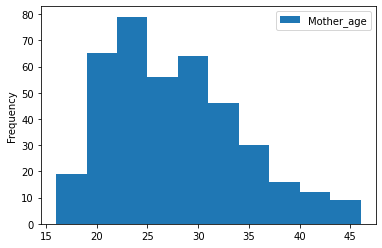

In [49]:
df2.sort_values(by=['mat_dnm'], inplace=True)
df2.plot.hist(x='mat_dnm',y='Mother_age')

<AxesSubplot:ylabel='Frequency'>

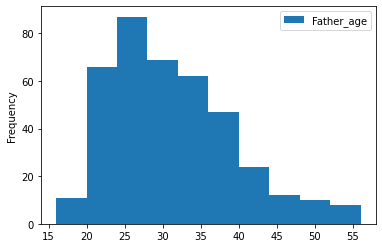

In [50]:
df2.sort_values(by=['pat_dnm'], inplace=True)
df2.plot.hist(x='pat_dnm',y='Father_age')

In [51]:
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [54]:
# independent t-test formulated as a linear model, first gather the data
model = smf.ols(formula = "Mother_age ~ mat_dnm", data = df2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mother_age   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        22:22:55   Log-Likelihood:                -1250.7
No. Observations:                 396   AIC:                             2505.
Df Residuals:                     394   BIC:                             2513.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.5164      0.770     25.336      0.000      18.002      21.031
mat_dnm        0.6026      0.056     10.772      0.000       0.493       0.713
==============================================================================
Omnibus:                       10.828   Durbin-Watson:                   1.192
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.046
Skew:                           0.385   Prob(JB):                      0.00399
Kurtosis:                       2.723   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#get p-value results of the data
results.pvalues

Intercept    1.001213e-84
mat_dnm      6.878208e-24
dtype: float64

Results: Starting with the R squared value we can see that 0.228 is not close to 1. R squared will give us the proportion of linearity 
between our two variables. The closer the value is to 0 then the more linear, the more correlation exists between both variables. However,
this information can be affected by variability so atypical values can really affect the R2. Then we have to look at the prob(F-statistic) 
which will tell us the significance of association between both values. This value along with the P-value will tell us if there is a correlation 
between the variables so that we can either accept or refuse our null hypothesis. Since this value (6.88e-24) is very close to 0 and obviously 
less than 0.05 we can reject our null hypothesis which in this case states that there isn't a correlation between paternal age and paternally inherited de novo mutations.

In [58]:
# independent t-test formulated as a linear model, first gather the data
model = smf.ols(formula = "Father_age ~ pat_dnm", data = df2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Father_age   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        22:31:20   Log-Likelihood:                -1191.6
No. Observations:                 396   AIC:                             2387.
Df Residuals:                     394   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0178      0.972      7.220      0.000       5.107       8.929
pat_dnm        0.4571      0.018     25.291      0.000       0.422       0.493
==============================================================================
Omnibus:                        3.967   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.721
Skew:                           0.226   Prob(JB):                        0.156
Kurtosis:                       3.146   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#get p-value results of the data
results.pvalues

Intercept    2.700593e-12
pat_dnm      1.552294e-84
dtype: float64

Results: Starting with the R squared value we can see that 0.619 is not close to 1. R squared will give us the proportion of linearity 
between our two variables. The closer the value is to 0 then the more linear, the more correlation exists between both variables. However,
this information can be affected by variability so atypical values can really affect the R2. Then we have to look at the prob(F-statistic) 
which will tell us the significance of association between both values. This value along with the P-value will tell us if there is a correlation 
between the variables so that we can either accept or refuse our null hypothesis. Since this value (1.55e-84) is very close to 0 and obviously 
less than 0.05 we can reject our null hypothesis which in this case states that there isn't a correlation between paternal age and paternally inherited de novo mutations.

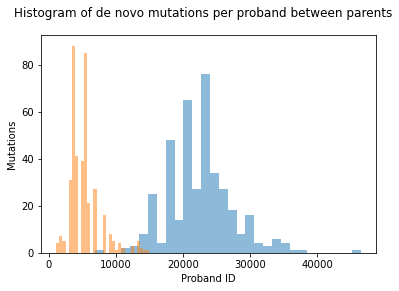

In [71]:
import matplotlib.pyplot as plt
#Plot histogram of maternal de novo mutations and paternal de novo mutations per proband 
fig, ax = plt.subplots()
ax.hist(df2["Proband_id"][df2["pat_dnm"]], label = "male", bins = 30, alpha = 0.5)
ax.hist(df2["Proband_id"][df2["mat_dnm"]], label = "female", bins = 30, alpha = 0.5)
fig.suptitle('Histogram of de novo mutations per proband between parents')
plt.xlabel('Proband ID')
plt.ylabel('Mutations')
plt.show()

In [75]:
#Test whether the number of maternally inherited de novo mutations per proband is significantly different than 
#the number of paternally inherited de novo mutations per proband.
model = smf.ols(formula = "Proband_id ~ mat_dnm + pat_dnm", data = df2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Proband_id   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1866
Date:                Fri, 18 Sep 2020   Prob (F-statistic):              0.830
Time:                        23:23:54   Log-Likelihood:                -4796.4
No. Observations:                 396   AIC:                             9599.
Df Residuals:                     393   BIC:                             9611.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.571e+04   9100.445      8.319      0.000    5.78e+04    9.36e+04
mat_dnm     -109.5939    468.076     -0.234      0.815   -1029.841     810.653
pat_dnm      107.2591    175.574      0.611      0.542    -237.923     452.441
==============================================================================
Omnibus:                      239.626   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.188
Skew:                          -0.142   Prob(JB):                     3.39e-06
Kurtosis:                       1.798   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Results: In this case we can see that the R2 value is very close to 0 so we can assume that there is no direct correlation 
between both values. There is no positive linearity. Additionally, when we look at the prob(F-statistic) we can see that the 
value is 0.1866 which is above 0.05 thus we can accept out null hypothesis that there is no correlation between the number of 
maternally inherited de novo mutations per proband vs the number of paternally inherited de novo mutations per proband.
Both results are not dependent on one another.


# Exercise 3. Generalized linear models: Poisson regression

In [76]:
#Refit data of mother's age vs. de novo mutations
model = smf.poisson(formula = "Mother_age ~ mat_dnm", data = df2)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.141794
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:             Mother_age   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:                 0.05120
Time:                        23:31:54   Log-Likelihood:                -1244.2
converged:                       True   LL-Null:                       -1311.3
Covariance Type:            nonrobust   LLR p-value:                 4.765e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0289      0.026    117.716      0.000       2.978       3.079
mat_dnm        0.0210      0.002     11.785      0.000       0.018       0.025
==============================================================================
"""

In [77]:
#Refit data of father's age vs. de novo mutations
model = smf.poisson(formula = "Father_age ~ pat_dnm", data = df2)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 2.997463
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:             Father_age   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:                  0.1682
Time:                        23:32:32   Log-Likelihood:                -1187.0
converged:                       True   LL-Null:                       -1427.0
Covariance Type:            nonrobust   LLR p-value:                2.093e-106
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6866      0.035     76.510      0.000       2.618       2.755
pat_dnm        0.0139      0.001     22.411      0.000       0.013       0.015
==============================================================================
"""

In [78]:
#Refit data of significance between father and mother de novo mutations per proband
model = smf.poisson(formula = "Proband_id ~ mat_dnm + pat_dnm", data = df2)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 14389.236391
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:             Proband_id   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      393
Method:                           MLE   Df Model:                            2
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:               0.0007981
Time:                        23:33:57   Log-Likelihood:            -5.6981e+06
converged:                       True   LL-Null:                   -5.7027e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2363      0.001   1.54e+04      0.000      11.235      11.238
mat_dnm       -0.0014   3.75e-05    -36.535      0.000      -0.001      -0.001
pat_dnm        0.0013    1.4e-05     95.581      0.000       0.001       0.001
==============================================================================
"""